---
title: "PyTorch Fundamentals"
description: "A comprehensive guide to PyTorch basics and essential operations"
date: "2025-02-09"
date-modified: "2025-02-22"
bread-crumbs: true
back-to-top-navigation: true
toc: true
toc-depth: 3
---

Welcome to this comprehensive guide covering the essential PyTorch operations and concepts you need to master deep learning with PyTorch.

In [3]:
!pip install torch


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [4]:
import torch

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch version: 1.13.1
CUDA available: False


## Basic Tensor Operations

Tensors are the fundamental data structure in PyTorch. Let's explore how to create and manipulate them.

### Tensor Creation

Creating tensors is the first step in any PyTorch workflow. Let's start by creating basic tensors from Python data structures.

In [5]:
data = [[1, 2], [3, 4]]
x = torch.tensor(data)

x

tensor([[1, 2],
        [3, 4]])

Common tensor creation functions provide efficient ways to initialize tensors with specific patterns or random values.

In [6]:
zeros = torch.zeros(2, 3)
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [7]:
ones = torch.ones(2, 3)
ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [8]:
randn = torch.randn(2, 3)  # Normal distribution
randn

tensor([[ 1.7444,  1.8386,  0.5435],
        [ 1.0317,  1.5514, -1.0549]])

In [9]:
rand = torch.rand(2, 3)    # Uniform [0, 1)
rand

tensor([[0.1848, 0.1586, 0.2189],
        [0.1242, 0.7478, 0.6344]])

In [10]:
arange = torch.arange(0, 10, 2)  # Range with step
arange

tensor([0, 2, 4, 6, 8])

### Tensor Properties

The `.shape` property tells you the dimensions of your tensor. This is crucial for understanding what operations you can perform and for debugging tensor size mismatches.

In [11]:
x.shape

torch.Size([2, 2])

The `.dim()` method returns the number of dimensions (axes) in your tensor. A scalar has 0 dimensions, a vector has 1, a matrix has 2, and so on.

In [12]:
x.dim()

2

Data types (`dtype`) control memory usage and computational precision. PyTorch supports various data types, with `float32` being the default for most operations.

In [13]:
x.dtype


torch.int64

### Indexing & Selection

Tensor indexing works similarly to NumPy arrays, supporting integer indexing, slicing, boolean indexing, and fancy indexing.

In [14]:
tensor = torch.arange(24).reshape(4, 6)
tensor

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])

In [15]:
# Basic indexing
print("Single element [1, 3]:", tensor[1, 3])
print("First row:", tensor[0])
print("First column:", tensor[:, 0])
print("Last row:", tensor[-1])
print("Submatrix [1:3, 2:5]:")
print(tensor[1:3, 2:5])

Single element [1, 3]: tensor(9)
First row: tensor([0, 1, 2, 3, 4, 5])
First column: tensor([ 0,  6, 12, 18])
Last row: tensor([18, 19, 20, 21, 22, 23])
Submatrix [1:3, 2:5]:
tensor([[ 8,  9, 10],
        [14, 15, 16]])


In [16]:
# Boolean indexing
mask = tensor > 10
print("Elements > 10:")
print(mask)
print(tensor[mask])

# Advanced indexing with lists
rows = [0, 2]
cols = [1, 4]
print("Elements at positions (0,1) and (2,4):")
print(tensor[rows, cols])

Elements > 10:
tensor([[False, False, False, False, False, False],
        [False, False, False, False, False,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True]])
tensor([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
Elements at positions (0,1) and (2,4):
tensor([ 1, 16])


### Dimension Operations

Dimension operations allow you to reshape, squeeze, unsqueeze, and transpose tensors. These operations are essential for preparing data for neural networks.


In [17]:
x = torch.arange(6)
x

tensor([0, 1, 2, 3, 4, 5])

- `.reshape()` returns a tensor with the new shape, creating a copy if necessary. 

In [18]:
#x.reshape(2, 4)

RuntimeError: shape '[2, 4]' is invalid for input of size 6

- `.view()` returns a view of the original tensor sharing the same data, but requires the tensor to be contiguous in memory.

In [19]:
#x.view(2, 4)

RuntimeError: shape '[2, 4]' is invalid for input of size 6


Squeezing and unsqueezing are essential for matching tensor dimensions in neural networks, especially when handling batch dimensions or preparing tensors for operations that require specific shapes.

- `.squeeze()` removes dimensions of size 1 
- `.unsqueeze()` adds dimensions of size 1. 

In [20]:
# Squeeze and unsqueeze
tensor_with_ones = torch.randn(1, 3, 1, 4)
print(tensor_with_ones)
print("Original shape:", tensor_with_ones.shape)

# Remove dimensions of size 1
squeezed = tensor_with_ones.squeeze()
print(squeezed)
print("After squeeze:", squeezed.shape)

# Add dimension of size 1 at position 0
unsqueezed = squeezed.unsqueeze(0)
print(unsqueezed)
print("After unsqueeze(0):", unsqueezed.shape)

tensor([[[[-0.5092,  0.1990, -0.2475,  0.5761]],

         [[ 0.5856, -1.1257, -1.3752, -1.7801]],

         [[ 1.0099,  0.2272, -0.2478,  0.3763]]]])
Original shape: torch.Size([1, 3, 1, 4])
tensor([[-0.5092,  0.1990, -0.2475,  0.5761],
        [ 0.5856, -1.1257, -1.3752, -1.7801],
        [ 1.0099,  0.2272, -0.2478,  0.3763]])
After squeeze: torch.Size([3, 4])
tensor([[[-0.5092,  0.1990, -0.2475,  0.5761],
         [ 0.5856, -1.1257, -1.3752, -1.7801],
         [ 1.0099,  0.2272, -0.2478,  0.3763]]])
After unsqueeze(0): torch.Size([1, 3, 4])


Transpose and permute operations rearrange tensor dimensions:

- `.T` - Reverses all dimensions (for 2D: rows become columns)
- `.permute()` - Rearranges dimensions in a specific order you specify
- Useful for matrix operations and changing data layout for neural networks

In [21]:
# Transpose operations
matrix = torch.randn(3, 4)
print("Original shape:", matrix.shape)

# Transpose (swap dimensions)
transposed = matrix.T
print("Transposed shape:", transposed.shape)

# Permute (rearrange dimensions)
tensor_3d = torch.randn(2, 3, 4)
permuted = tensor_3d.permute(2, 0, 1)  # (4, 2, 3)
print("3D tensor shape:", tensor_3d.shape)
print("Permuted shape:", permuted.shape)

Original shape: torch.Size([3, 4])
Transposed shape: torch.Size([4, 3])
3D tensor shape: torch.Size([2, 3, 4])
Permuted shape: torch.Size([4, 2, 3])


### Broadcasting

### Matrix Operations

## Device Management

Managing GPU/CPU placement is critical when working with large language models. Understanding device handling ensures efficient memory usage and prevents device mismatch errors.

Device placement determines whether tensors are stored in CPU or GPU memory. This is crucial for performance and memory management in deep learning.

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


## Gradient Computation and Autograd

PyTorch's automatic differentiation system tracks operations on tensors to compute gradients automatically. This is essential for understanding how LLMs learn and update their parameters during training.

## Neural Network Training Basics

Training a neural network follows a consistent pattern regardless of the specific architecture. This section covers the fundamental training loop that forms the backbone of all deep learning workflows, including training large language models.

### Basic Training Template

The neural network training process consists of several key components that work together in a structured loop. Let's examine each component and then see them in action with a complete example.

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

### 1. Define a Simple Neural Network

First, let's create a simple feedforward neural network for a regression task. This network will learn to map input features to target values.

In [25]:
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create model instance
input_size = 4
hidden_size = 64
output_size = 1

model = SimpleNet(input_size, hidden_size, output_size)
print(f"Model architecture:\n{model}")
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")

Model architecture:
SimpleNet(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

Total parameters: 4545


### 2. Generate Dummy Data

For this example, we'll create synthetic data with a known relationship between inputs and outputs. This allows us to verify that our training process is working correctly.

In [26]:
# Generate synthetic regression data
n_samples = 1000
X = torch.randn(n_samples, input_size)

# Create a known relationship: y = 2*x1 + 3*x2 - x3 + 0.5*x4 + noise
weights = torch.tensor([2.0, 3.0, -1.0, 0.5])
y = X @ weights + 0.1 * torch.randn(n_samples)  # Add some noise
y = y.unsqueeze(1)  # Add dimension for output

print(f"Input shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"First 5 samples:")
print(f"X: {X[:5]}")
print(f"y: {y[:5].flatten()}")

Input shape: torch.Size([1000, 4])
Target shape: torch.Size([1000, 1])
First 5 samples:
X: tensor([[ 0.7861, -2.0957,  0.4538, -0.4391],
        [ 0.4836,  0.9264,  0.0693,  0.6713],
        [-0.9132, -1.6069, -0.5967,  0.7912],
        [ 1.1139,  1.4326,  0.3500,  0.6649],
        [ 0.9982,  0.9345,  0.0857, -0.5905]])
y: tensor([-5.3888,  3.9458, -5.6086,  6.4730,  4.3326])


### 3. Create DataLoader

DataLoaders handle batching and shuffling of data, which is essential for efficient training and good convergence.

In [27]:
# Split data into train and validation sets
train_size = int(0.8 * n_samples)
val_size = n_samples - train_size

X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")

Training samples: 800
Validation samples: 200
Number of training batches: 25
Number of validation batches: 7


### 4. Set Up Loss Function and Optimizer

The loss function measures how far our predictions are from the target values. The optimizer updates model parameters based on the computed gradients.

In [28]:
# Loss function for regression
criterion = nn.MSELoss()

# Optimizer - Adam is a good default choice
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Learning rate: {optimizer.param_groups[0]['lr']}")

Loss function: MSELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Learning rate: 0.001


### 5. The Training Loop

This is the core of neural network training. The basic template follows these steps for each epoch:

1. **Training phase**: Process batches, compute gradients, update parameters
2. **Validation phase**: Evaluate model performance without updating parameters
3. **Track metrics**: Monitor loss and other metrics to assess training progress

In [29]:
def train_epoch(model, train_loader, criterion, optimizer):
    """Train the model for one epoch"""
    model.train()  # Set model to training mode
    total_loss = 0
    num_batches = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        # Clear gradients from previous iteration
        optimizer.zero_grad()
        
        # Forward pass
        output = model(data)
        
        # Compute loss
        loss = criterion(output, target)
        
        # Backward pass - compute gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        # Track metrics
        total_loss += loss.item()
        num_batches += 1
    
    return total_loss / num_batches

def validate_epoch(model, val_loader, criterion):
    """Validate the model for one epoch"""
    model.eval()  # Set model to evaluation mode
    total_loss = 0
    num_batches = 0
    
    with torch.no_grad():  # Disable gradient computation for efficiency
        for data, target in val_loader:
            # Forward pass only
            output = model(data)
            loss = criterion(output, target)
            
            # Track metrics
            total_loss += loss.item()
            num_batches += 1
    
    return total_loss / num_batches

print("Training and validation functions defined")

Training and validation functions defined


### 6. Run the Complete Training Loop

In [30]:
# Training configuration
num_epochs = 100
train_losses = []
val_losses = []

print("Starting training...")
print(f"Epochs: {num_epochs}")
print(f"Batch size: {batch_size}")
print(f"Learning rate: {optimizer.param_groups[0]['lr']}")
print("-" * 50)

# Main training loop
for epoch in range(num_epochs):
    # Train for one epoch
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    
    # Validate for one epoch
    val_loss = validate_epoch(model, val_loader, criterion)
    
    # Store losses for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] - "
              f"Train Loss: {train_loss:.6f}, "
              f"Val Loss: {val_loss:.6f}")

print("-" * 50)
print("Training completed!")
print(f"Final train loss: {train_losses[-1]:.6f}")
print(f"Final validation loss: {val_losses[-1]:.6f}")

Starting training...
Epochs: 100
Batch size: 32
Learning rate: 0.001
--------------------------------------------------
Epoch [10/100] - Train Loss: 0.040728, Val Loss: 0.033150
Epoch [20/100] - Train Loss: 0.020628, Val Loss: 0.023212
Epoch [30/100] - Train Loss: 0.015698, Val Loss: 0.018270
Epoch [40/100] - Train Loss: 0.014767, Val Loss: 0.017183
Epoch [50/100] - Train Loss: 0.012873, Val Loss: 0.016725
Epoch [60/100] - Train Loss: 0.012166, Val Loss: 0.016114
Epoch [70/100] - Train Loss: 0.011709, Val Loss: 0.016437
Epoch [80/100] - Train Loss: 0.012212, Val Loss: 0.015567
Epoch [90/100] - Train Loss: 0.010846, Val Loss: 0.015752
Epoch [100/100] - Train Loss: 0.010901, Val Loss: 0.016775
--------------------------------------------------
Training completed!
Final train loss: 0.010901
Final validation loss: 0.016775


### 7. Visualize Training Progress

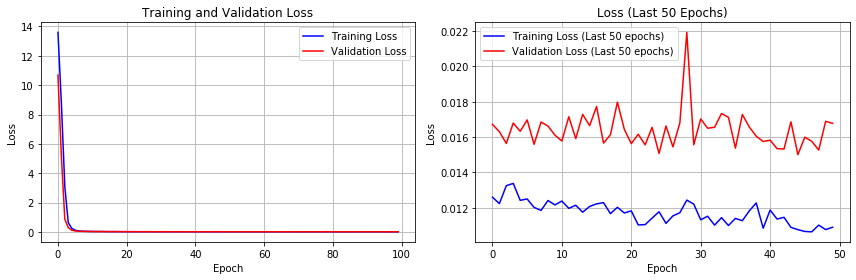

In [31]:
# Plot training curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_losses[-50:], label='Training Loss (Last 50 epochs)', color='blue')
plt.plot(val_losses[-50:], label='Validation Loss (Last 50 epochs)', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss (Last 50 Epochs)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 8. Test the Trained Model

In [32]:
# Test the model on some validation samples
model.eval()
with torch.no_grad():
    # Get a few validation samples
    test_inputs = X_val[:10]
    test_targets = y_val[:10]
    
    # Make predictions
    predictions = model(test_inputs)
    
    print("Model Performance on Test Samples:")
    print("-" * 50)
    print("True weights used to generate data: [2.0, 3.0, -1.0, 0.5]")
    print("-" * 50)
    
    for i in range(10):
        pred = predictions[i].item()
        true = test_targets[i].item()
        error = abs(pred - true)
        print(f"Sample {i+1}: Predicted={pred:.4f}, True={true:.4f}, Error={error:.4f}")
    
    # Calculate mean absolute error
    mae = torch.mean(torch.abs(predictions - test_targets)).item()
    print(f"\nMean Absolute Error: {mae:.4f}")

# Compare learned weights with true weights (approximately)
print("\nLearned vs True Relationship:")
print("-" * 30)
print("The model has learned to approximate the relationship:")
print("y = 2*x1 + 3*x2 - x3 + 0.5*x4 + noise")
print("This demonstrates successful learning of the underlying pattern!")

Model Performance on Test Samples:
--------------------------------------------------
True weights used to generate data: [2.0, 3.0, -1.0, 0.5]
--------------------------------------------------
Sample 1: Predicted=2.2870, True=2.3892, Error=0.1022
Sample 2: Predicted=0.3818, True=0.4525, Error=0.0707
Sample 3: Predicted=1.5059, True=1.4416, Error=0.0643
Sample 4: Predicted=1.6262, True=1.7048, Error=0.0787
Sample 5: Predicted=3.5084, True=3.5694, Error=0.0609
Sample 6: Predicted=-1.5973, True=-1.7370, Error=0.1397
Sample 7: Predicted=-2.3752, True=-2.4108, Error=0.0356
Sample 8: Predicted=-0.9677, True=-0.9359, Error=0.0318
Sample 9: Predicted=-0.8716, True=-0.7391, Error=0.1325
Sample 10: Predicted=-1.7833, True=-1.7157, Error=0.0676

Mean Absolute Error: 0.0784

Learned vs True Relationship:
------------------------------
The model has learned to approximate the relationship:
y = 2*x1 + 3*x2 - x3 + 0.5*x4 + noise
This demonstrates successful learning of the underlying pattern!


### Key Training Loop Components Summary

The neural network training template follows this essential pattern:

```python
# 1. Setup
model = YourModel()
criterion = nn.MSELoss()  # or nn.CrossEntropyLoss() for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 2. Training Loop
for epoch in range(num_epochs):
    # Training Phase
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()      # Clear gradients
        outputs = model(batch)     # Forward pass
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()            # Backward pass (compute gradients)
        optimizer.step()           # Update parameters
    
    # Validation Phase
    model.eval()
    with torch.no_grad():
        for batch in val_loader:
            outputs = model(batch)
            val_loss = criterion(outputs, targets)
```

This template applies universally whether you're training simple feedforward networks, CNNs, RNNs, Transformers, or large language models. The core loop remains the same - only the model architecture and data preprocessing change.

## nn.Module

The base class for all neural network components in PyTorch. Understanding nn.Module is crucial since all transformer layers, attention mechanisms, and LLM architectures inherit from this class.

## nn.Embedding

Embedding layers convert discrete tokens into dense vector representations. These are fundamental to all language models and determine how words, subwords, or characters are represented numerically.

## Masking

Masking handles variable-length sequences and prevents attention to padding tokens. This is essential for efficient batch processing of text sequences in transformers and language models.

## Loss Functions

Loss functions measure how far model predictions are from target values. CrossEntropyLoss is the standard choice for language modeling tasks, making it essential for training and fine-tuning LLMs.

## Optimizers and Learning Rate Scheduling

Optimizers update model parameters based on computed gradients. Understanding Adam, learning rate schedules, and warmup strategies is crucial for effective LLM training and fine-tuning.

## Data Loading for Text

DataLoaders handle batching of variable-length text sequences efficiently. Understanding collate functions and padding strategies is essential for working with text data in production LLM workflows.

## Model Saving and Loading

Saving and loading model checkpoints is crucial for LLM workflows due to long training times and large model sizes. Understanding state_dict and checkpoint management prevents data loss and enables model deployment.